# Setup

set working directory to guitarist-net and add to path

In [1]:
%cd /content/drive/Othercomputers/My MacBook Pro/guitarist-net

/content/drive/Othercomputers/My MacBook Pro/guitarist-net


install requirements

In [2]:
!pip install -r requirements.txt &> /dev/null

imports

In [3]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import librosa
import librosa.display
from plot_listen.listen import play
from plot_listen.plot import plot, plot_single_string_item
from save_load import load_weights_from_file
from util import torch_to_numpy
from globals import *
from data.single_string_dataset import SingleStringDataset
from ddsp.ddsp_mono_synth import DDSPMonoSynth
from torch.utils.data import DataLoader
import os

# Load harmonic model data

In [4]:
harm_model_path = "/content/drive/MyDrive/Research/guitarist-net-storage/output/2022-08-16 10:24PM DDSP Mono Synth : 1s crepe short verb, batch 64/checkpoints/5000 epochs"
harm_resynth_audio = np.array([librosa.load(os.path.join(harm_model_path, f"test_reverb_audio/{i}_resynth.wav"),sr=SR)[0] for i in range(10)])
harm_osc_audio = np.array([librosa.load(os.path.join(harm_model_path, f"test_harmonic/{i}_resynth.wav"),sr=SR)[0] for i in range(10)])
harm_checkpoint = torch.load(os.path.join(harm_model_path, "model_checkpoint.pt"))
harm_epochs_trained = harm_checkpoint['epochs_trained']
harm_training_loss_values = harm_checkpoint['training_loss_values']

# Load inharmonic model data

In [5]:
inharm_model_path = "/content/drive/MyDrive/Research/guitarist-net-storage/output/2022-08-17 05:58PM DDSP Mono Synth : inharm beta -10.0/checkpoints/5000 epochs"
inharm_resynth_audio = np.array([librosa.load(os.path.join(inharm_model_path, f"test_reverb_audio/{i}_resynth.wav"),sr=SR)[0] for i in range(10)])
inharm_osc_audio = np.array([librosa.load(os.path.join(inharm_model_path, f"test_harmonic/{i}_resynth.wav"),sr=SR)[0] for i in range(10)])
inharm_checkpoint = torch.load(os.path.join(inharm_model_path, "model_checkpoint.pt"))
inharm_epochs_trained = inharm_checkpoint['epochs_trained']
inharm_training_loss_values = inharm_checkpoint['training_loss_values']

# Load target audio

In [6]:
target_audio = np.array([librosa.load(os.path.join(inharm_model_path, f"test_reverb_audio/{i}_target.wav"),sr=SR)[0] for i in range(10)])

# Compare training loss curves

Zoomed out

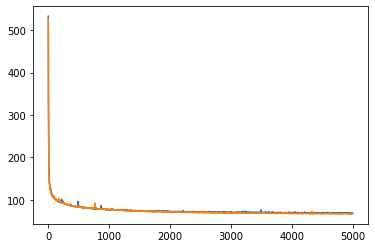

In [7]:
plot(harm_training_loss_values) # blue
plot(inharm_training_loss_values) # orange

start at 1000 epochs

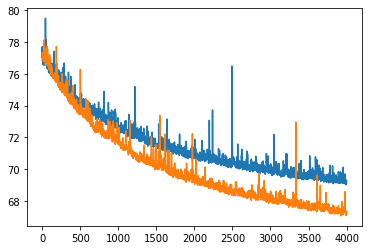

In [8]:
plot(harm_training_loss_values[1000:]) # blue
plot(inharm_training_loss_values[1000:]) # orange

final values (5000 epochs)

In [9]:
print(f"harmonic model: {harm_training_loss_values[-1]}")
print(f"inharmonic model: {inharm_training_loss_values[-1]}")

harmonic model: 69.3039219379425
inharmonic model: 67.15326523780823


# Compare audio

select testing item (0 - 9)

In [10]:
idx = 

## target audio

In [11]:
play(target_audio[idx])

## harm resynth

In [12]:
play(harm_resynth_audio[idx])

## inharm resynth

In [13]:
play(inharm_resynth_audio[idx])

# Compare spectrograms

## target audio

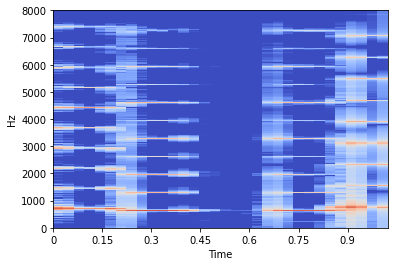

In [14]:
target_spec = librosa.amplitude_to_db(np.abs(librosa.stft(target_audio[idx])))
target_img = librosa.display.specshow(target_spec, y_axis='linear', x_axis='time', sr=SR)

## harmonic resynth audio

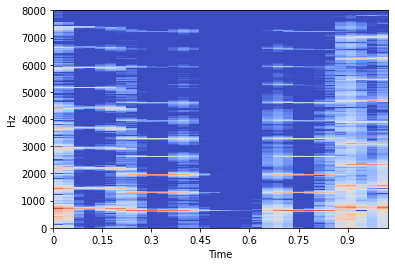

In [15]:
harm_resynth_spec = librosa.amplitude_to_db(np.abs(librosa.stft(harm_resynth_audio[idx])))
harm_resynth_img = librosa.display.specshow(harm_resynth_spec, y_axis='linear', x_axis='time', sr=SR)

## inharmonic resynth audio

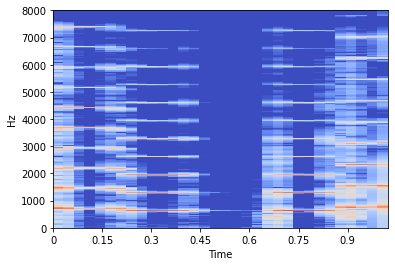

In [16]:
inharm_resynth_spec = librosa.amplitude_to_db(np.abs(librosa.stft(inharm_resynth_audio[idx])))
inharm_resynth_img = librosa.display.specshow(inharm_resynth_spec, y_axis='linear', x_axis='time', sr=SR)

# Inspect Inharmonicity

In [17]:
inharm_beta = synth.harmonic_oscillator.inharm_beta

NameError: ignored

In [ ]:
print(inharm_beta)

In [ ]:
print(torch.sigmoid(inharm_beta))